In [3]:
import torch
from custom_models import load_custom_class
import seaborn as sns
import matplotlib.pyplot as plt
from example_tokenization import custom_tokenization
from custom_tokenizer_abstract import CustomTokenizerGeneral

# sub class from modelling_bert "RobertaForSequenceClassification" and override the forward method
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

In [2]:
#verify all imports are working
import torch
from transformers import AutoTokenizer
from custom_models import load_custom_class
import seaborn as sns
import matplotlib.pyplot as plt
from example_tokenization import custom_tokenization
from custom_tokenizer_abstract import CustomTokenizerGeneral

# Add these debug prints to verify imports
print("Imports loaded successfully")
print("custom_tokenization function exists:", custom_tokenization is not None)
print("CustomTokenizerGeneral exists:", CustomTokenizerGeneral is not None)

# Check if the module paths are correct
import sys
print("\nPython path:")
for path in sys.path:
    print(path)

Imports loaded successfully
custom_tokenization function exists: True
CustomTokenizerGeneral exists: True

Python path:
/Users/hugo/MSc Artificial Intelligence/Logic & Language/Project/Untitled
/opt/anaconda3/lib/python312.zip
/opt/anaconda3/lib/python3.12
/opt/anaconda3/lib/python3.12/lib-dynload

/opt/anaconda3/lib/python3.12/site-packages
/opt/anaconda3/lib/python3.12/site-packages/aeosa
/opt/anaconda3/lib/python3.12/site-packages/setuptools/_vendor


In [ ]:
# from example_tokenization import custom_tokenization
# from custom_tokenizer_abstract import CustomTokenizerGeneral

# repo_link_nli = "cross-encoder/nli-distilroberta-base"
# #repo_link_nli = "cross-encoder/nli-MiniLM2-L6-H768"

# model_args = {}

# tokenizer_nli, model_nli = load_custom_class(repo_link_nli, device, **model_args)
# vocabulary_id2tok = {tok_id:tok for tok, tok_id in tokenizer_nli.vocab.items()}

# # BERT
# #custom_tokenizer = CustomTokenizerGeneral(tokenizer_nli, custom_tokenization, separator_marker="##", special_space_token="")
# # RoBERTa
# custom_tokenizer = CustomTokenizerGeneral(tokenizer_nli, custom_tokenization, separator_marker="", special_space_token="Ġ")

Tensors and operations will be done on cpu.


In [4]:
import torch
from custom_models import load_custom_class
from greedy_tokenizer import greedy_prefix_tokenization  # Changed from greedy_prefix_tokenizer
from custom_tokenizer_abstract import CustomTokenizerGeneral

# Load model and tokenizer
repo_link_nli = "cross-encoder/nli-distilroberta-base"
model_args = {}
tokenizer_nli, model_nli = load_custom_class(repo_link_nli, device, **model_args)

# Setup custom tokenizer with greedy prefix tokenization
custom_tokenizer = CustomTokenizerGeneral(
    tokenizer_nli,
    greedy_prefix_tokenization,  # Changed from greedy_prefix_tokenizer
    separator_marker="",
    special_space_token="Ġ"
)

Tensors and operations will be done on cpu.


In [5]:
import json
import pandas as pd

# data_path = "data/" + "/snli_1.0" + "/snli_1.0_test.jsonl"
data_path = "multinli_1.0_dev_mismatched.jsonl"

data = []
limit = 500_000
with open(data_path, "r") as file:
    for _ in range(limit):
        json_obj = file.readline()
        if json_obj != "":
            data += [json.loads(json_obj)]
        else:
            break


In [8]:
data_df = {
    "label": [],
    "sent1": [],
    "sent2": []
}

for datum in data:
    data_df["label"] += [datum["gold_label"]]
    data_df["sent1"] += [datum["sentence1"]] # premise
    data_df["sent2"] += [datum["sentence2"]] # hypothesis

data_df = pd.DataFrame(data_df)
print(data_df.shape)
data_df.head()

(10000, 3)


,label,sent1,sent2
0,contradiction,Your contribution helped make it possible for ...,Your contributions were of no help with our st...
1,contradiction,"The answer has nothing to do with their cause,...",Dictionaries are indeed exercises in bi-unique...
2,entailment,We serve a classic Tuscan meal that includes ...,We serve a meal of Florentine terrine.
3,contradiction,"A few months ago, Carl Newton and I wrote a le...",Carl Newton and I have never had any other pre...
4,entailment,"I was on this earth you know, I've lived on th...",I don't yet know the reason why I have lived o...


In [50]:
idx_example = 9990
example = data_df.iloc[idx_example]["sent1"] + " " + data_df.iloc[idx_example]["sent2"]
example_custom = (data_df.iloc[idx_example]["sent1"], data_df.iloc[idx_example]["sent2"])

In [28]:
# Add these debug prints
repo_link_nli = "cross-encoder/nli-distilroberta-base"
print("Model name:", repo_link_nli)
print("Contains 'roberta':", "roberta" in repo_link_nli.lower())
print("Contains 'bert':", "bert" in repo_link_nli.lower())

model_args = {}

tokenizer_nli, model_nli = load_custom_class(repo_link_nli, device, **model_args)

Model name: cross-encoder/nli-distilroberta-base
Contains 'roberta': True
Contains 'bert': True


Accuracy: 0.4471


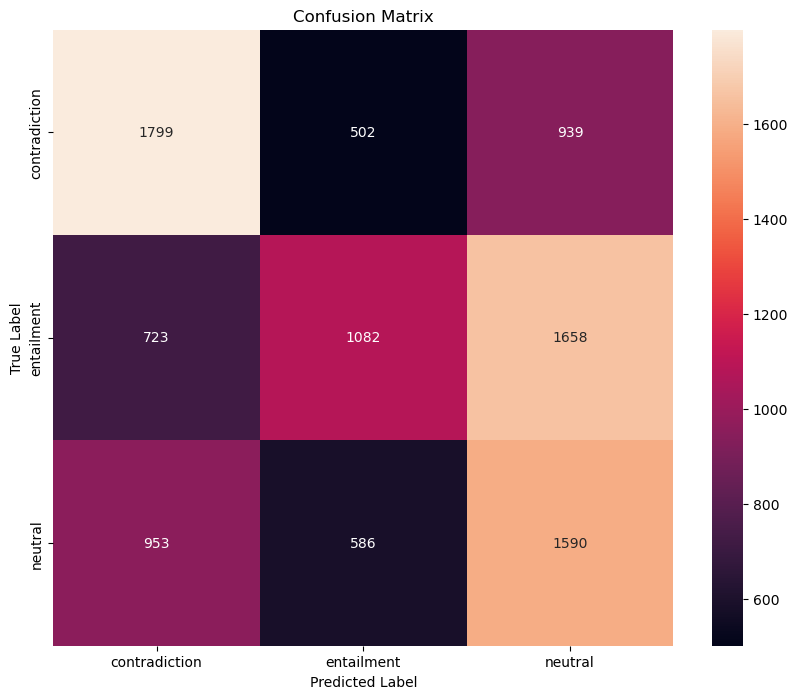

In [10]:
import json
import pandas as pd

# Load the predictions from prefix_results_mnli.json
with open('prefix_results_mnli.json', 'r') as f:
    predictions = json.load(f)

# Load the original MultiNLI data
df = pd.read_json('multinli_1.0_dev_mismatched.jsonl', lines=True)

# Convert predictions to a more manageable format
pred_labels = []
for i in range(len(predictions)):
    pred_labels.append(predictions[str(i)][0])  # Get just the predicted label, not the confidence score

# Get the golden labels from the DataFrame
gold_labels = data_df['label'].tolist()

# Calculate accuracy
correct = sum(1 for pred, gold in zip(pred_labels, gold_labels) if pred == gold)
total = len(pred_labels)
accuracy = correct / total

print(f"Accuracy: {accuracy:.4f}")

#Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(gold_labels, pred_labels, labels=['contradiction', 'entailment', 'neutral'])
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['contradiction', 'entailment', 'neutral'],
            yticklabels=['contradiction', 'entailment', 'neutral'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

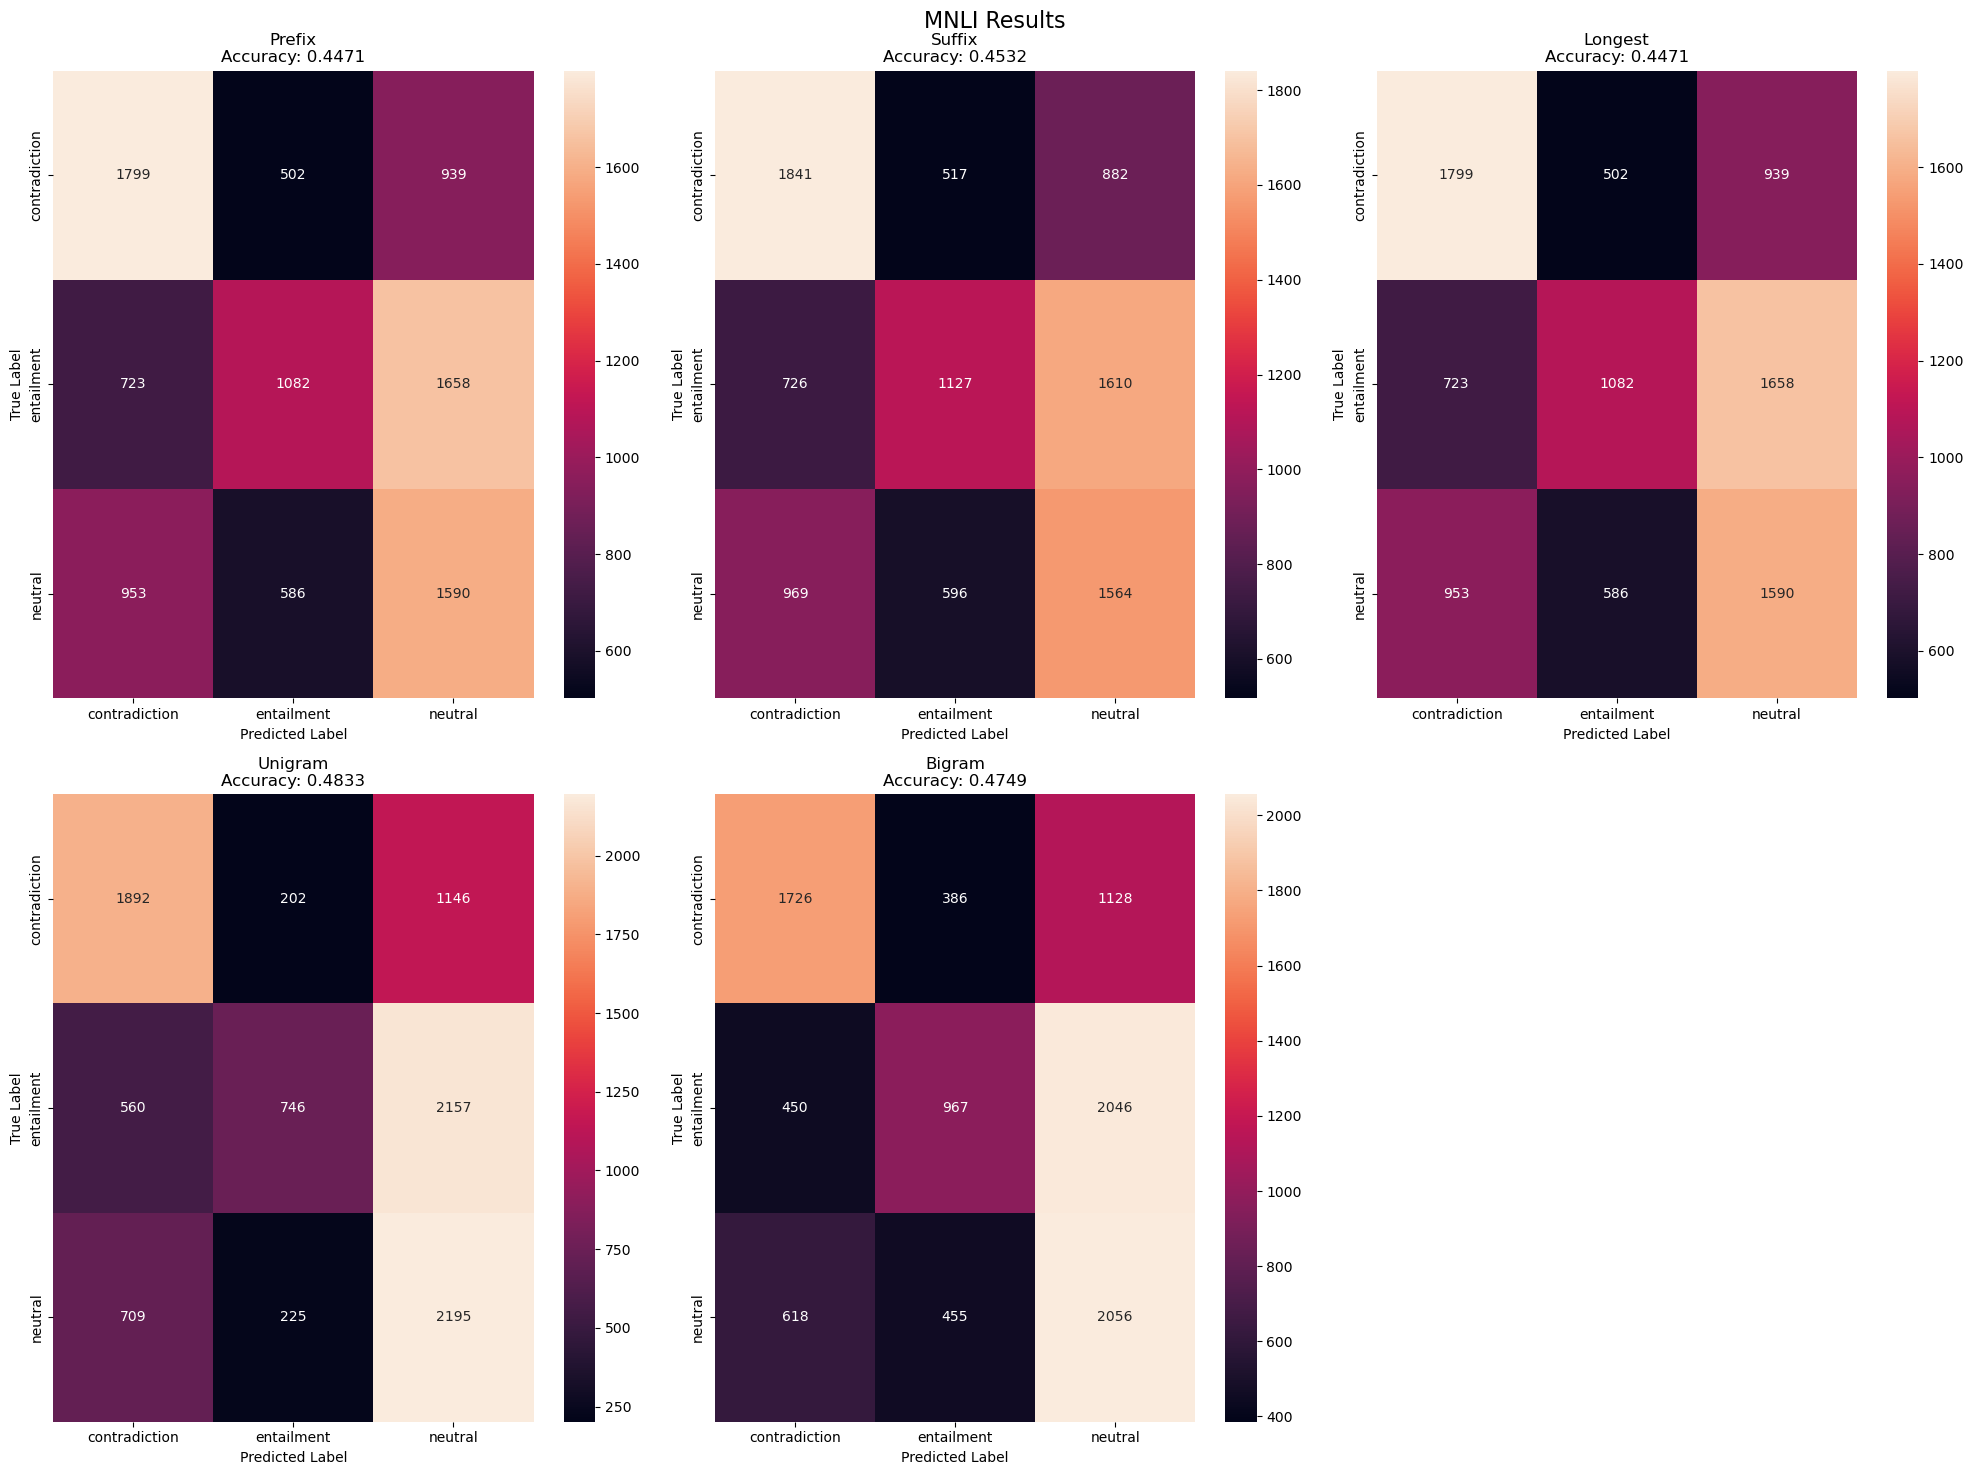


MNLI Accuracies:
Unigram: 0.4833
Bigram: 0.4749
Suffix: 0.4532
Prefix: 0.4471
Longest: 0.4471




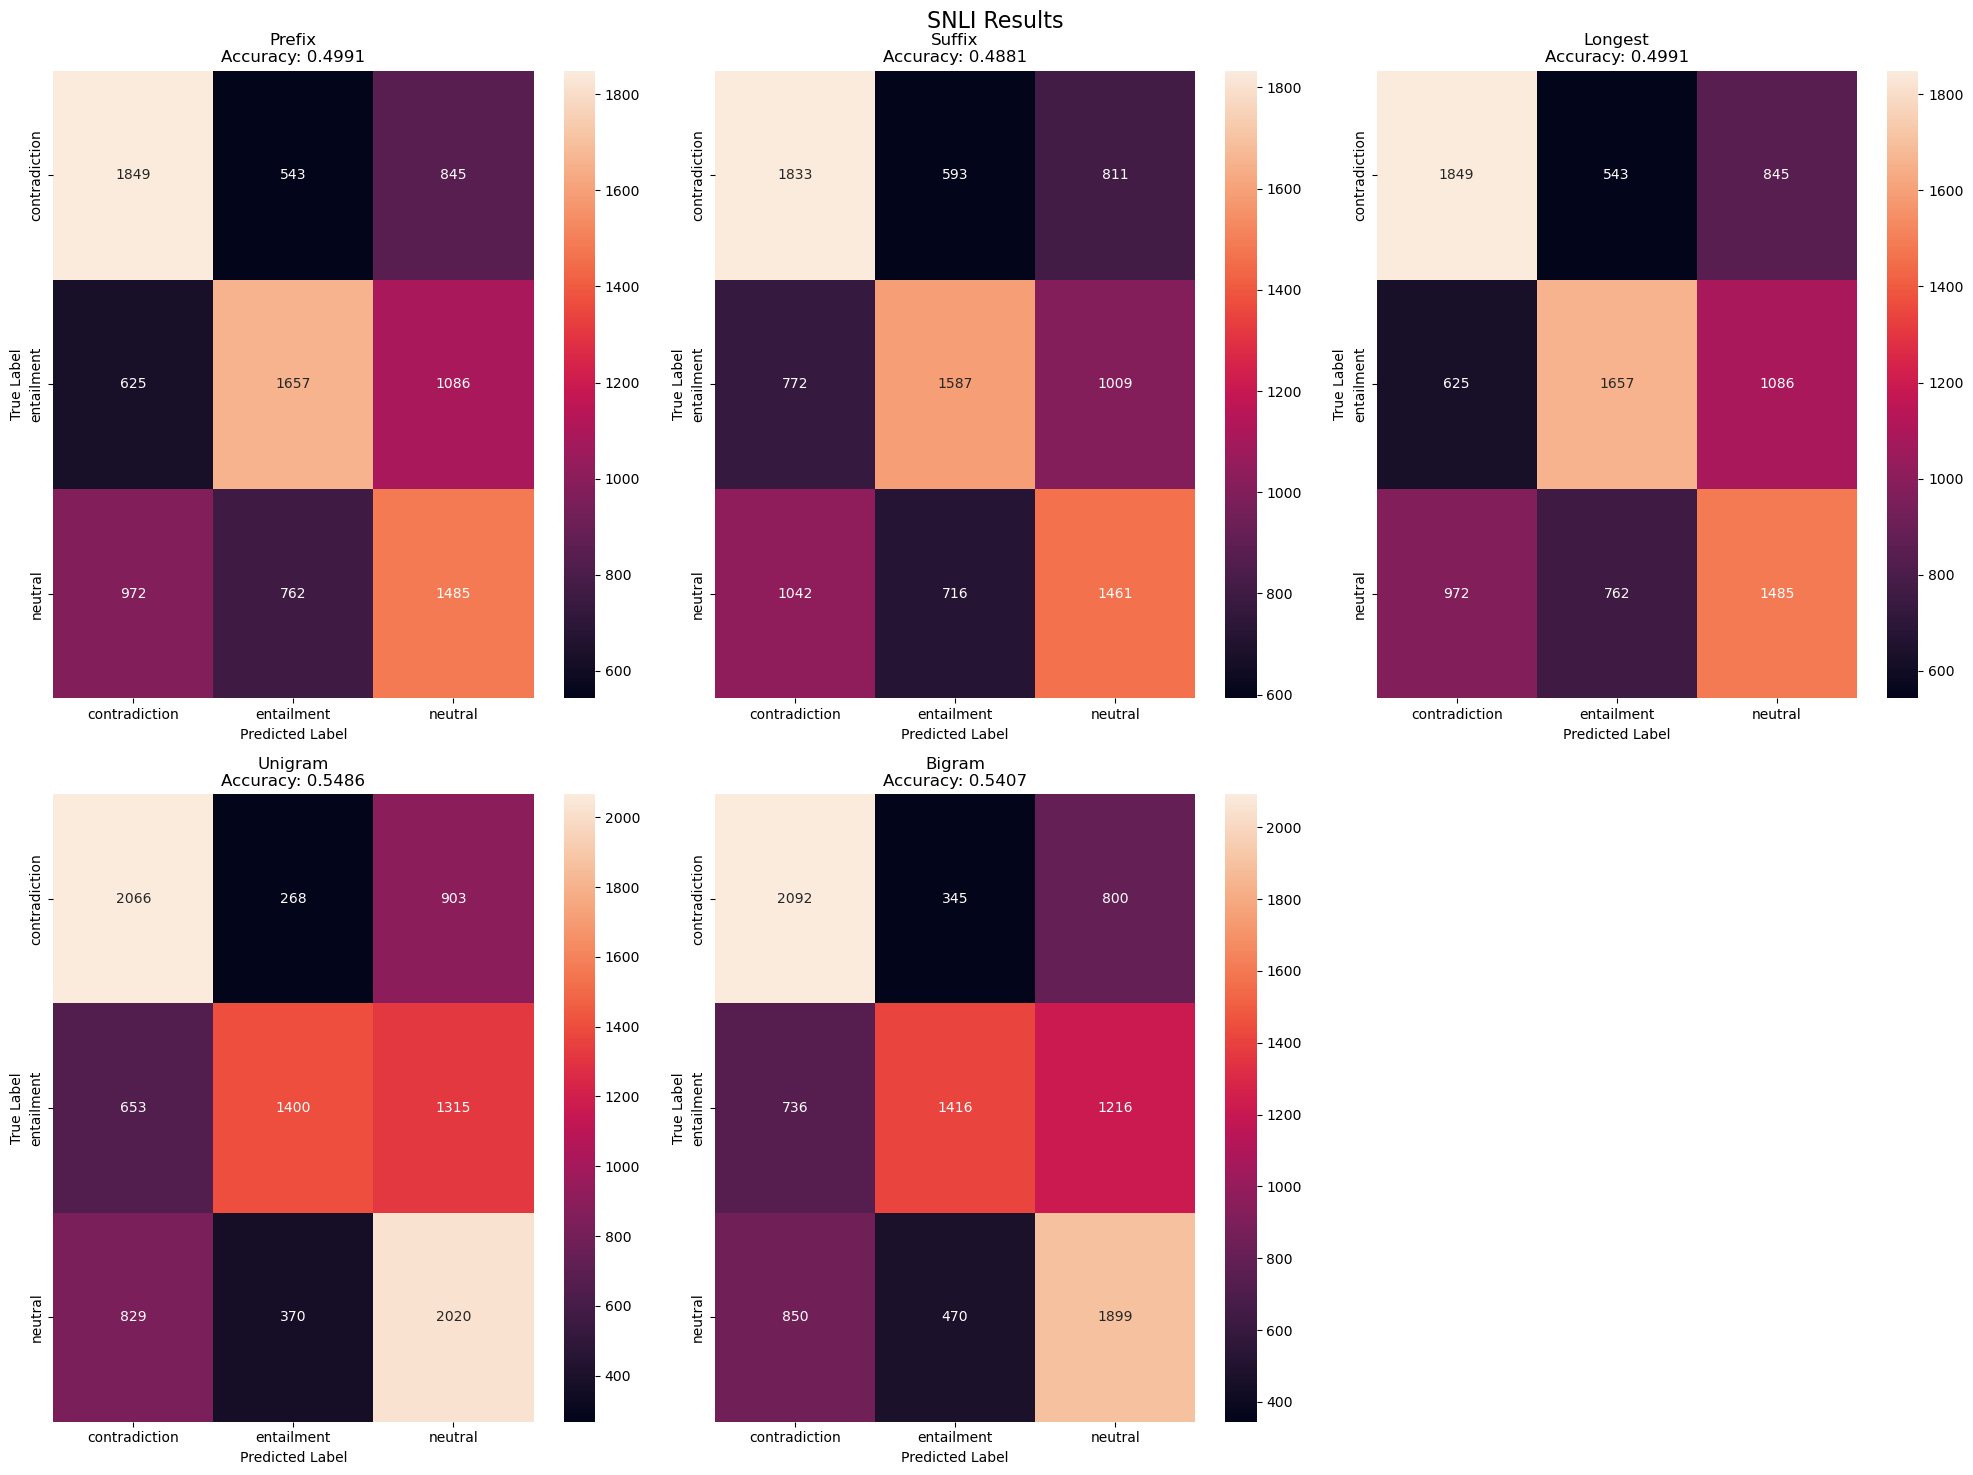


SNLI Accuracies:
Unigram: 0.5486
Bigram: 0.5407
Prefix: 0.4991
Longest: 0.4991
Suffix: 0.4881




In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# List of result files to analyze
result_files = [
    # MNLI results
    'prefix_results_mnli.json',
    'suffix_results_mnli.json',
    'longest_results_mnli.json',
    'unigram_results_mnli.json',
    'bigram_results_mnli.json',
    # SNLI results
    'prefix_results_snli.json',
    'suffix_results_snli.json',
    'longest_results_snli.json',
    'unigram_results_snli.json',
    'bigram_results_snli.json'
]

# Load datasets
mnli_df = pd.read_json('multinli_1.0_dev_mismatched.jsonl', lines=True)
snli_df = pd.read_json('snli_1.0_test.jsonl', lines=True)

# Create two separate figures for MNLI and SNLI
for dataset in ['mnli', 'snli']:
    # Get relevant data
    if dataset == 'mnli':
        gold_labels = mnli_df['gold_label'].tolist()
        current_files = [f for f in result_files if 'mnli' in f]
    else:
        gold_labels = snli_df['gold_label'].tolist()
        current_files = [f for f in result_files if 'snli' in f]

    # Create figure for subplots
    plt.figure(figsize=(20, 15))

    # Store accuracies for comparison
    accuracies = {}

    for idx, file in enumerate(current_files):
        # Load predictions
        with open(file, 'r') as f:
            predictions = json.load(f)

        # Convert predictions to list
        pred_labels = [predictions[str(i)][0] for i in range(len(predictions))]

        # Calculate accuracy
        accuracy = accuracy_score(gold_labels, pred_labels)
        method_name = file.replace(f'_results_{dataset}.json', '')
        accuracies[method_name] = accuracy

        # Create confusion matrix
        plt.subplot(2, 3, idx+1)
        cm = confusion_matrix(gold_labels, pred_labels, labels=['contradiction', 'entailment', 'neutral'])
        sns.heatmap(cm, annot=True, fmt='d', xticklabels=['contradiction', 'entailment', 'neutral'],
                    yticklabels=['contradiction', 'entailment', 'neutral'])
        plt.title(f'{method_name.capitalize()}\nAccuracy: {accuracy:.4f}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

    plt.suptitle(f'{dataset.upper()} Results', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Print accuracies in sorted order
    print(f"\n{dataset.upper()} Accuracies:")
    for method, acc in sorted(accuracies.items(), key=lambda x: x[1], reverse=True):
        print(f"{method.capitalize()}: {acc:.4f}")
    print("\n" + "="*50 + "\n")